# Treinamento Personalizado com YOLOv5

Neste tutorial, montamos um conjunto de dados e treinamos um modelo YOLOv5 personalizado para reconhecer os objetos em nosso conjunto de dados. Para isso, seguiremos os seguintes passos:

* Reunir um conjunto de dados de imagens e rotular o conjunto de dados
* Exportar o conjunto de dados para YOLOv5
* Treinar o YOLOv5 para reconhecer os objetos no conjunto de dados
* Avaliar o desempenho do modelo YOLOv5
* Executar teste para ver o modelo em funcionamento



![](https://uploads-ssl.webflow.com/5f6bc60e665f54545a1e52a5/615627e5824c9c6195abfda9_computer-vision-cycle.png)

# Passo 1: Instalação

O código a seguir é utilizado para clonar o repositório YOLOv5 do GitHub e instalar suas dependências no ambiente Google Colab.

A primeira linha do código !git clone https://github.com/ultralytics/yolov5 faz o clone do repositório YOLOv5 do GitHub e baixa todo o código-fonte para a pasta atual do Colab.

A segunda linha %cd yolov5 entra na pasta "yolov5" que foi criada pelo comando anterior.

A terceira linha %pip install -qr requirements.txt instala as dependências necessárias para o YOLOv5 funcionar corretamente. Especificamente, o comando pip install é usado para instalar as bibliotecas Python especificadas no arquivo requirements.txt. O sinal -q indica que a instalação deve ser silenciosa (ou seja, sem mostrar a saída na tela), e o sinal -r indica que as bibliotecas devem ser instaladas a partir de um arquivo de requisitos.

A quarta linha %pip install -q roboflow instala a biblioteca roboflow no ambiente Colab. A biblioteca roboflow é uma biblioteca Python que permite trabalhar com conjuntos de dados de treinamento de forma mais fácil e eficiente.

Com esses comandos, o ambiente Colab está configurado para começar a trabalhar com o YOLOv5. Agora, o usuário pode carregar seus dados de treinamento, criar e treinar modelos de detecção de objetos usando o YOLOv5 e, em seguida, avaliar a performance do modelo.

In [ ]:
#clone YOLOv5 and
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

Cloning into 'yolov5'...
remote: Enumerating objects: 15352, done.
remote: Total 15352 (delta 0), reused 0 (delta 0), pack-reused 15352
Receiving objects: 100% (15352/15352), 14.33 MiB | 10.48 MiB/s, done.
Resolving deltas: 100% (10497/10497), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 KB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 7.8 MB/s eta 0:00:00


Os comandos abaixo são utilizados no ambiente Google Colab para importar bibliotecas necessárias e verificar se a instalação do PyTorch está funcionando corretamente.

A primeira linha import torch é usada para importar a biblioteca PyTorch. PyTorch é uma biblioteca de aprendizado de máquina de código aberto baseada em Python que é amplamente usada em tarefas de processamento de imagens e visão computacional, incluindo detecção de objetos.

A segunda linha import os é usada para importar a biblioteca os. A biblioteca os é uma biblioteca padrão do Python que fornece uma maneira de interagir com o sistema operacional. Ela é comumente usada para manipular caminhos de arquivo, arquivos e pastas.

A terceira linha from IPython.display import Image, clear_output é usada para importar a classe Image e a função clear_output da biblioteca IPython.display. Essa biblioteca fornece um conjunto de ferramentas para visualizar dados e resultados em notebooks Jupyter.

A quarta linha print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})") é usada para exibir uma mensagem informando se a instalação do PyTorch está funcionando corretamente. A mensagem exibida contém a versão do PyTorch que está sendo usada e a unidade de processamento gráfico (GPU) ou unidade central de processamento (CPU) em uso no momento. A expressão torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU' é usada para verificar se uma GPU está disponível. Se estiver, a mensagem exibirá o nome da GPU, caso contrário, exibirá "CPU".

In [ ]:
import torch
import os

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.13.1+cu116 (Tesla T4)


    Para treinar o modelo personalizado, é necessário montar um conjunto de dados de imagens representativas com anotações de caixa delimitadora em torno dos objetos que se quer detectar. É preciso que o conjunto de dados esteja no formato YOLOv5.

No Roboflow, pode-se escolher entre dois caminhos:

*Converter um conjunto de dados existente para o formato YOLOv5. O Roboflow suporta mais de [30 formatos de detecção de objetos para conversão](https://roboflow.com/formats).

*Carregar imagens brutas e rotulá-las no Roboflow com o [Roboflow Annotate](https://docs.roboflow.com/annotate).

# Annotate

![](https://roboflow-darknet.s3.us-east-2.amazonaws.com/roboflow-annotate.gif)

# Version

![](https://roboflow-darknet.s3.us-east-2.amazonaws.com/robolfow-preprocessing.png)

O comando abaixo é utilizado para definir uma variável de ambiente chamada DATASET_DIRECTORY e atribuir o valor /content/datasets a ela. Essa variável de ambiente pode ser usada posteriormente pelo Yolo para acessar o diretório /content/datasets.

A variável de ambiente "DATASET_DIRECTORY" aponta para o diretório de dados que contém as imagens e os arquivos de anotação do conjunto de dados. Desta forma estes arquivos serão acessados mais facilmete em seu código YOLO sem precisar especificar o caminho completo do diretório toda vez que precisar acessá-los.



In [ ]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

O código a seguir utiliza a biblioteca Python "Roboflow" para trabalhar com modelos de detecção de objetos baseados em YOLOv5.

Roboflow é uma biblioteca Python que permite trabalhar com conjuntos de dados de treinamento de forma simples e eficiente. Essa biblioteca pode ajudar a automatizar várias tarefas do fluxo de trabalho de treinamento, como baixar, pré-processar e carregar conjuntos de dados.

Este código em Python faz o download de um conjunto de dados de imagens rotuladas para ser usado em tarefas de treinamento de modelo de aprendizado de máquina baseado em visão computacional, em particular, para treinar um modelo de detecção de objetos usando a arquitetura YOLOv5.

A primeira linha do código importa a biblioteca *roboflow*. Em seguida, a variável *rf* é inicializada com uma instância da classe *Roboflow*, passando como parâmetro a chave de API do Roboflow para autenticação. Essa chave de API é obtida no painel de controle do site do Roboflow.

A terceira linha de código define o projeto a ser usado para baixar o conjunto de dados. O método *workspace* é usado para definir o espaço de trabalho dentro do Roboflow (no caso "iff"), e o método "project" é usado para definir o projeto dentro do espaço de trabalho (no caso "cell-counting-vyzdn").

A quarta linha de código usa o método *version* para especificar qual versão do projeto deve ser baixada (no caso, a versão 1). O método *download* é então chamado para baixar o conjunto de dados especificado pela versão do projeto e armazená-lo na variável *dataset*.

Resumindo, o código usa o Roboflow para baixar um conjunto de dados rotulado que pode ser usado para treinar um modelo de detecção de objetos usando a arquitetura YOLOv5.

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="30fnPU6bg1n0VE0Iw6oj")
project = rf.workspace("auladetopicos").project("chess-uhtx3")
dataset = project.version(1).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/chess-1 in yolov5pytorch:: 100%|██████████| 36/36 [00:00<00:00, 2586.42it/s]


# Passo 3: Treinar o modelo YOLOv5 personalizado

O comando a seguir está sendo usado para treinar um modelo YOLOv5 em um conjunto de dados de detecção de objetos baixado anteriormente.

O comando começa com um ponto de exclamação (!), o que indica que o comando seguinte é um comando de sistema operacional que deve ser executado no terminal do Google Colab.

O comando principal é *python train.py*, que executa o script de treinamento YOLOv5 no Python. Os argumentos que seguem definem diferentes parâmetros de treinamento, que são explicados abaixo:

*--img 640: define o tamanho da imagem de entrada para o treinamento como 640x640 pixels.

*--batch 16": define o tamanho do lote (batch) para o treinamento como 16 imagens.

*--epochs 1500": define o número de épocas (ou ciclos de treinamento) para o treinamento como 1500.

*--data {dataset.location}/data.yaml: define o caminho para o arquivo de configuração do conjunto de dados no formato YAML. A variável "dataset.location" é usada para acessar o diretório onde o conjunto de dados foi baixado, e *data.yaml* é o nome do arquivo de configuração do conjunto de dados.

*--weights yolov5l.pt: define o caminho para os pesos pré-treinados do modelo YOLOv5. Nesse caso, o modelo YOLOv5L é utilizado como ponto de partida para o treinamento. Os pesos pré-treinados são armazenados no arquivo "yolov5l.pt".

*--cache: habilita o cache durante o treinamento, o que pode melhorar o desempenho do treinamento ao armazenar em cache as imagens carregadas em memória.

No geral, esses comandos estão sendo usados para executar o treinamento de um modelo YOLOv5 personalizado em um conjunto de dados específico. O modelo resultante pode então ser usado para detectar objetos em imagens e vídeos.

In [ ]:
!python train.py --img 640 --batch 16 --epochs 1500 --data {dataset.location}/data.yaml --weights yolov5l.pt --cache

train: weights=yolov5l.pt, cfg=, data=/content/datasets/chess-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=1500, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-131-g0c8de3f Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.01

# Análise do desempenho personalizado do detector YOLOv5

Os comandos abaixo são usados para iniciar o TensorBoard, uma ferramenta de visualização e depuração fornecida pelo TensorFlow.

O primeiro comando, *%load_ext tensorboard*, carrega a extensão do TensorBoard no ambiente de execução do Google Colab.

O segundo comando, *%tensorboard --logdir runs*, inicia o TensorBoard com os logs de treinamento armazenados no diretório *runs*. O TensorBoard é exibido como uma interface da web, que pode ser acessada por meio de um link fornecido pelo Colab.

Esses comandos permitem visualizar e analisar o progresso do treinamento do modelo YOLOv5. O TensorBoard fornece várias ferramentas de visualização, como gráficos de perda, visualizações de histograma de peso, visualizações de imagens de entrada e saída do modelo, entre outros. Ele pode ajudar a identificar problemas de treinamento, otimizar parâmetros de treinamento e monitorar o progresso geral do treinamento.

Se você é novo nessas métricas, a que merece mais atenção é a  mAP_0.5

Saiba mais sobre a precisão média média [aqui](https://blog.roboflow.com/mean-average-precision/).

**Obs:**

O caractere "%" é usado no Google Colab para definir comandos especiais conhecidos como "comandos de linha mágica". Esses comandos especiais são usados para executar tarefas específicas no ambiente de execução do Colab, que podem incluir tarefas como carregar extensões de biblioteca, visualizar gráficos ou executar comandos do sistema.

No exemplo abaixo, *%load_ext tensorboard* é um comando de linha mágica que é usado para carregar a extensão do TensorBoard no ambiente de execução do Colab, enquanto *%tensorboard --logdir runs* é um comando de linha mágica que é usado para iniciar o TensorBoard com os logs de treinamento armazenados no diretório *runs*.


In [ ]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

#Detectar objetos de interesse na imagem utilizando a rede neural anteriormente treinada

Detectar os objetos presentes nas imagens presentes na pasta  teste/imagens baixada do Roboflow.

O comando a seguir é um script Python que usa a biblioteca YOLOv5 para realizar a detecção de objetos em imagens. Mais especificamente, ele realiza a detecção em imagens do conjunto de teste de um determinado conjunto de dados.

Comando em detalhes:

!python detect.py: executa o script Python detect.py no ambiente do Google Colab.

--hide-label: indica que os rótulos dos objetos detectados não serão exibidos.

--hide-conf: indica que as probabilidades de confiança dos objetos detectados não serão exibidas.

--weights runs/train/exp/weights/best.pt: especifica o caminho do arquivo de pesos do modelo YOLOv5 que será usado para realizar a detecção.

--img 640: isso especifica a resolução da imagem de entrada que será alimentada ao modelo. Neste caso, a resolução é de 640x640 pixels.

--conf 0.1: isso especifica o limite mínimo de confiança para as detecções de objetos. Qualquer detecção com uma probabilidade de confiança inferior a 0,1 será descartada.

--source {dataset.location}/test/images: isso especifica a pasta de imagens de teste do conjunto de dados que serão usadas para realizar a detecção de objetos. O valor {dataset.location} é provavelmente uma variável que foi definida anteriormente e aponta para a pasta raiz do conjunto de dados.

Resumindo, o comando acima executa o script detect.py usando o modelo YOLOv5 para realizar a detecção de objetos em imagens de teste de um conjunto de dados específico, e define parâmetros como resolução de imagem de entrada, limite mínimo de confiança e localização dos arquivos de modelo.

In [ ]:
!python detect.py --hide-label --hide-conf --weights runs/train/exp/weights/best.pt --img 640 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/datasets/chess-1/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=True, hide_conf=True, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-131-g0c8de3f Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 267 layers, 46167513 parameters, 0 gradients, 107.8 GFLOPs
image 1/1 /content/datasets/chess-1/test/images/1be_jpg.rf.fdf99180d7f75b0290be26bce5a6ad86.jpg: 640x640 1 black-king, 2 black-knights, 6 black-pawns, 2 white-kings, 4 white-pawns, 50.2ms
Speed: 0.5ms pre-process, 50.2ms inference, 1.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


#Apresentar as imagens com os objetos detectados



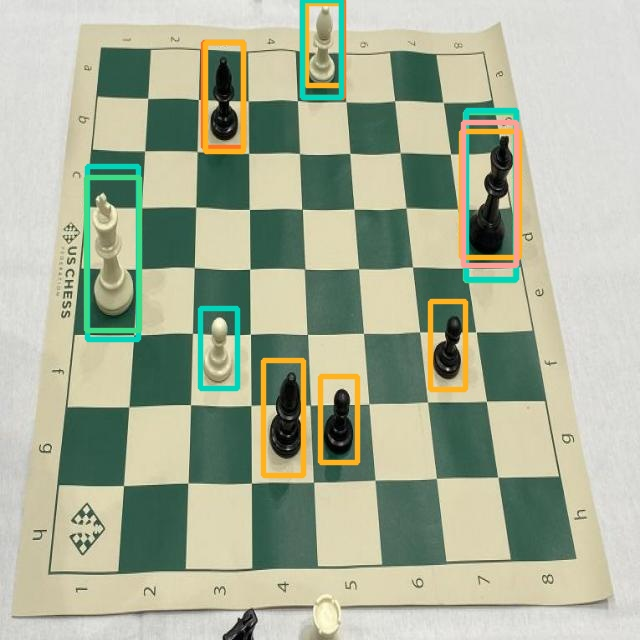

In [ ]:
import glob
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assumindo que as imagens são JPG
    image = cv2.imread(imageName)
    cv2_imshow(image)
    print("\n")


#Fazer o download do arquivo de pesos

O código a seguir faz o download do arquivo de pesos construído no treinamento para uso futuro.

In [ ]:
from google.colab import files
files.download('./runs/train/exp/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Conclusão e próximos passos

Parabéns! Você treinou um modelo YOLOv5 para reconhecer seus objetos personalizados.

Para melhorar o desempenho do seu modelo, recomendamos primeiro interagir na cobertura e qualidade dos seus conjuntos de dados. Consulte este guia para [melhoria de desempenho do modelo](https://github.com/ultralytics/yolov5/wiki/Tips-for-Best-Training-Results).

Para implantar seu modelo em um aplicativo, consulte este guia sobre [exportar seu modelo para destinos de produção](https://github.com/ultralytics/yolov5/issues/251).

Depois que seu modelo estiver em produção, você desejará iterar e melhorar continuamente seu conjunto de dados e modelo por meio do [aprendizado ativo](https://blog.roboflow.com/what-is-active-learning/).
